# Estatística Frequências e Medidas

- Fernanda Soares Lima - Turma 7 | Data Analytics<br>
Squad Katherine Johnson

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv

In [28]:
df=pd.read_json('enem_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [29]:

print(df.isna().sum())
df.info()
df.describe()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


<Figure size 800x1000 with 0 Axes>

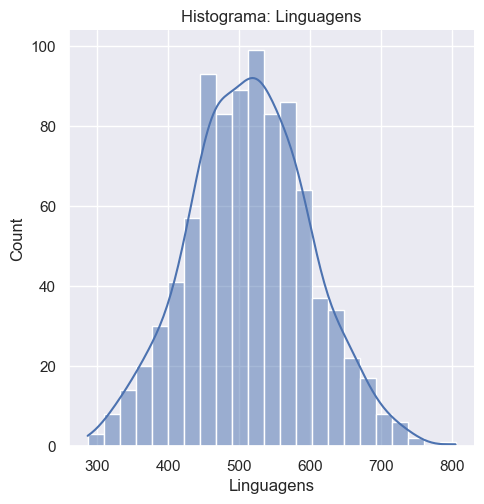

<Figure size 800x1000 with 0 Axes>

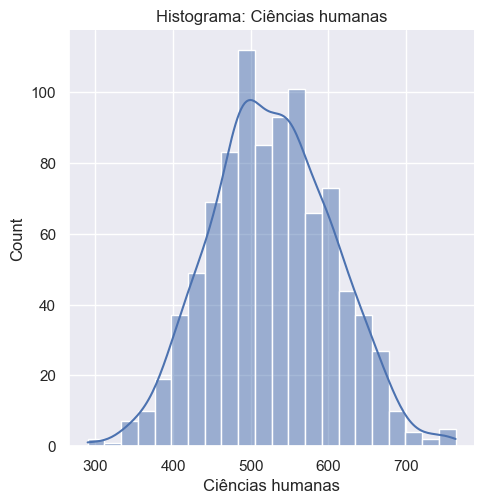

<Figure size 800x1000 with 0 Axes>

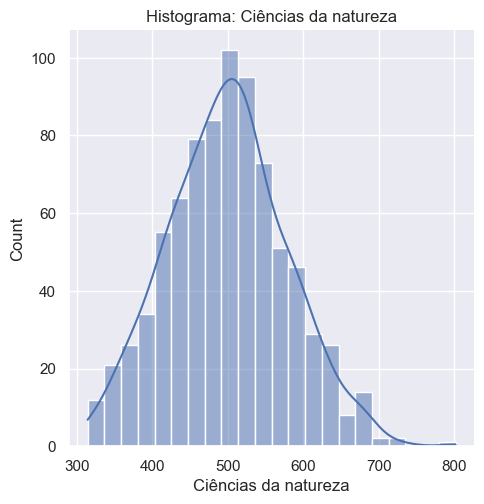

<Figure size 800x1000 with 0 Axes>

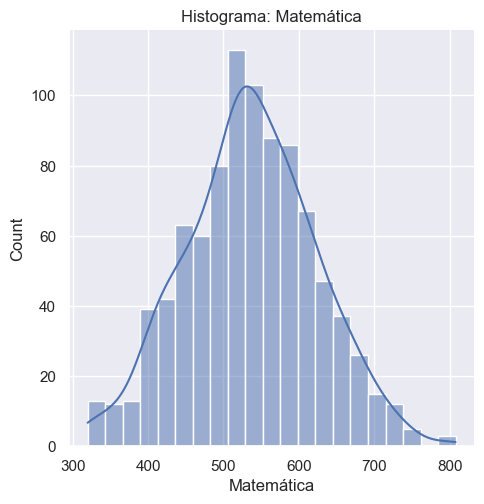

<Figure size 800x1000 with 0 Axes>

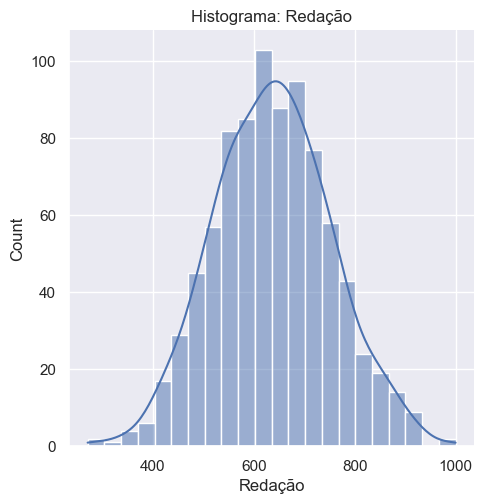

In [30]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
# create distplots
for column in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = df , x = column, kde= True)
    plt.title("Histograma: "+column)

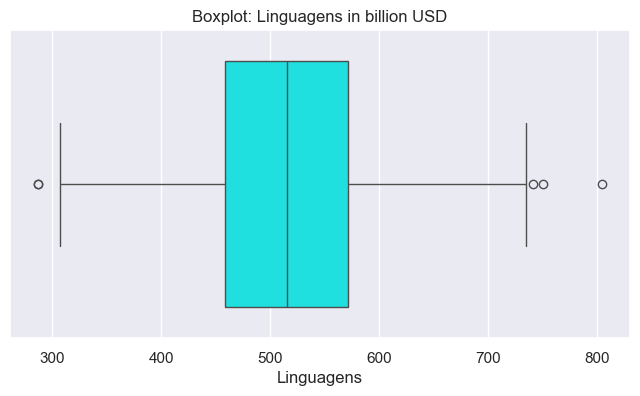

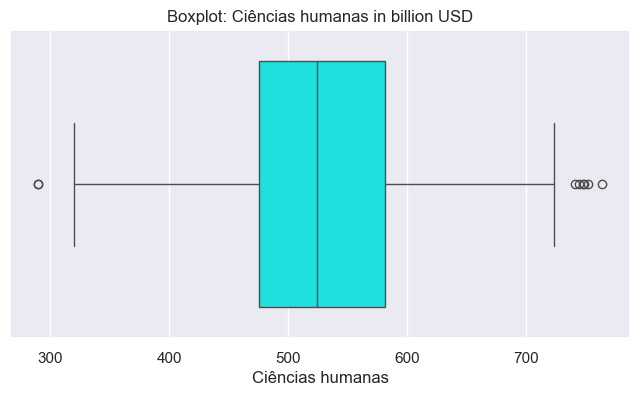

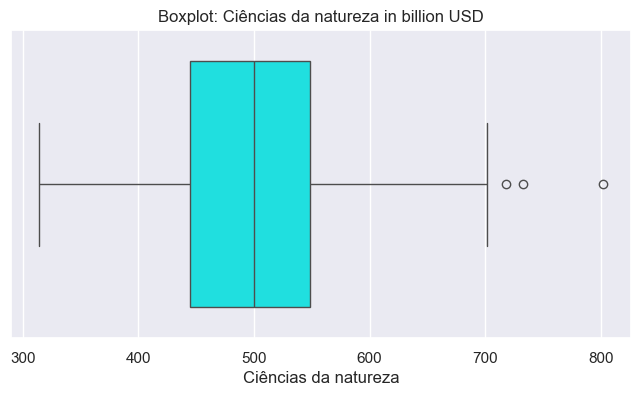

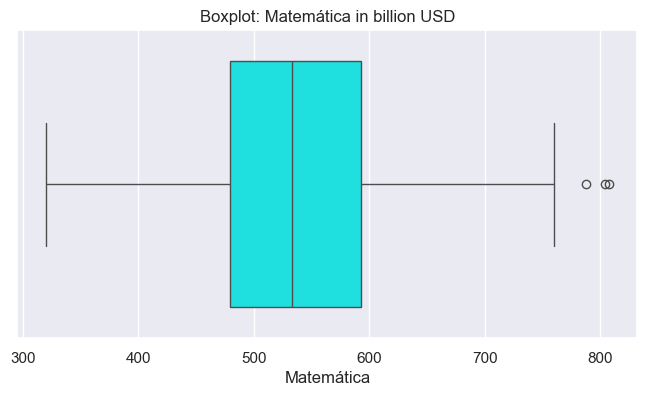

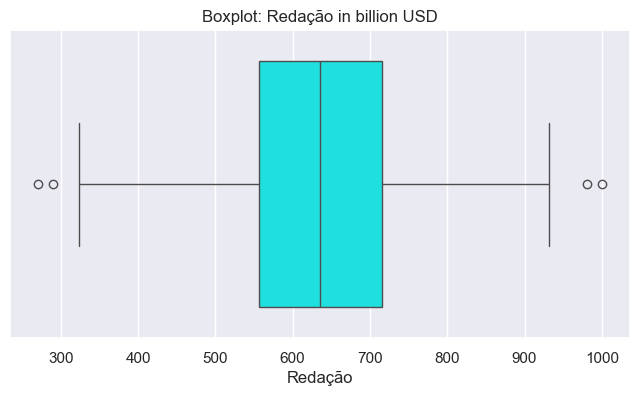

In [31]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
### para cada uma das colunas numericas roda o boxplot
for column in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = df , x = column, color='cyan',showfliers=True)
    plt.title("Boxplot: "+column + " in billion USD")

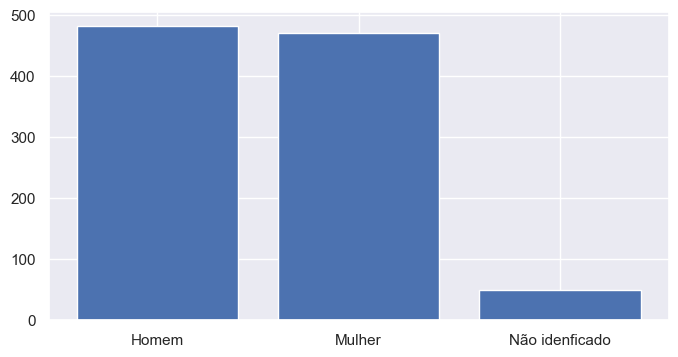

In [32]:
plt.bar(df['Sexo'].value_counts().index,df['Sexo'].value_counts().values)
plt.show()

1. Qual das disciplinas tem a maior amplitude de nota?

In [33]:
def amplitude(df):
    descri=df.describe()
    valor=descri.loc['max']-descri.loc['min']
    return valor

disciplina_maior_amplitude= amplitude(df).sort_values(ascending=False).head(1)
print(f"A disciplina que tem maior amplitude é {disciplina_maior_amplitude.index[0]}, com valor de {disciplina_maior_amplitude.iloc[0]}")

A disciplina que tem maior amplitude é Redação, com valor de 729.1600351395


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [34]:
# DROPANDO VALORES FALTOSOS
df_remover_na_todo=df.copy()
df_remover_na_todo=df_remover_na_todo.dropna()  # se apagar com dropna de 1000 linhas fica apenas 548
df_remover_na_todo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            548 non-null    float64
 1   Ciências humanas      548 non-null    float64
 2   Ciências da natureza  548 non-null    float64
 3   Matemática            548 non-null    float64
 4   Redação               548 non-null    float64
 5   Sexo                  548 non-null    object 
dtypes: float64(5), object(1)
memory usage: 30.0+ KB


In [35]:
# Fazendo a média e a mediana

df_remover_na=df_remover_na_todo

print("Caso eu remova os valores NaN com dropna() e mantenha o dataset com apenas 548 linhas:\n")
for column in df.select_dtypes(include=np.number).columns:
    
    print(f"A coluna {column} possui média de {df[column].mean():.2f} e mediana de {df_remover_na[column].median():.2f}")


Caso eu remova os valores NaN com dropna() e mantenha o dataset com apenas 548 linhas:

A coluna Linguagens possui média de 514.52 e mediana de 517.13
A coluna Ciências humanas possui média de 527.04 e mediana de 528.50
A coluna Ciências da natureza possui média de 499.32 e mediana de 502.94
A coluna Matemática possui média de 535.97 e mediana de 532.96
A coluna Redação possui média de 637.78 e mediana de 639.60


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2 <br>
b. Matemática e suas Tecnologias - 4 <br>
c. Linguagens, Códigos e suas Tecnologias - 2 <br>
d. Ciências Humanas e suas Tecnologias -1 <br>
e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?



In [36]:
df_media_ponderada=df_remover_na.copy()   # Estou utilizando o dataset tratado que os valores faltosos foram substituidos pela média

# df.__deepcopy__ Cópia profunda

df_media_ponderada['Linguagens']=df_media_ponderada['Linguagens']*2/10
df_media_ponderada['Ciências humanas']=df_media_ponderada['Ciências humanas']*1/10
df_media_ponderada['Ciências da natureza']=df_media_ponderada['Ciências da natureza']*1/10
df_media_ponderada['Matemática']=df_media_ponderada['Matemática']*4/10
df_media_ponderada['Redação']=df_media_ponderada['Redação']*2/10

disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']


df_media_ponderada['Média Total']=df_media_ponderada[disciplinas].sum(axis=1)

# Os melhores 500 estudantes pela média total
top500_estudantes=df_media_ponderada.sort_values(ascending=False, by="Média Total").head(500)
top500_estudantes["Média Total"].std()

print(f"Os 500 estudantes mais bem colocados com os pesos do Curso Ciência da Computação da UFPE possuem:") 
print(f"Desvio padrão de {top500_estudantes["Média Total"].std():.3f} e Média de {top500_estudantes["Média Total"].mean():.3f}")



Os 500 estudantes mais bem colocados com os pesos do Curso Ciência da Computação da UFPE possuem:
Desvio padrão de 40.436 e Média de 557.290


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [46]:
top40_estudantes=df_media_ponderada.sort_values(ascending=False, by="Média Total").head(40)

print(f"Variância de {top40_estudantes["Média Total"].var():.3f} e Média de {top40_estudantes["Média Total"].mean():.3f}")


Variância de 295.768 e Média de 636.683


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [38]:
q75_math=np.quantile(df_remover_na['Matemática'],0.75)
q75_ling=np.quantile(df_remover_na['Linguagens'],0.75)

print(f"O valor do teto do terceiro quartil para a disciplina de Matemática é {q75_math:.5} e para Linguagens é {q75_ling:.5}")

O valor do teto do terceiro quartil para a disciplina de Matemática é 591.34 e para Linguagens é 572.65


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?


<Figure size 800x400 with 0 Axes>

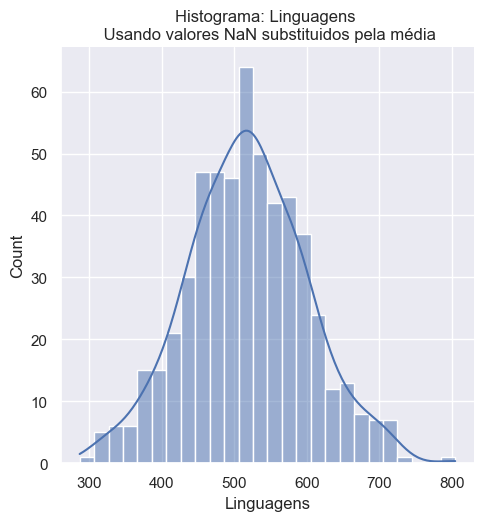

<Figure size 800x400 with 0 Axes>

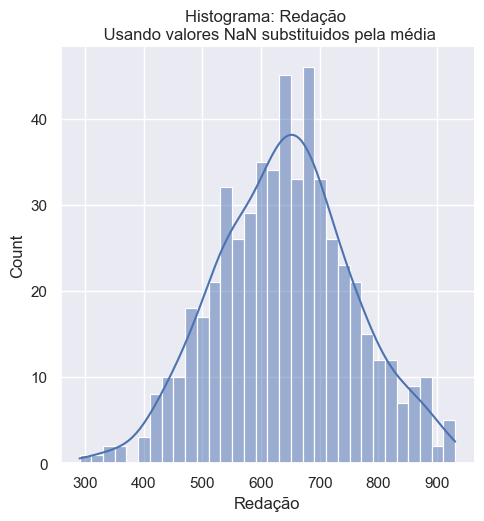

 Um histograma simétrico teria uma distribuição no qual as barras são distribuídas de forma semelhante, ao redor do ponto central (como a média) 

    Os histogramas dropando completamente os valores faltosos, consequentemente possui menos linhas no dataset, mas são histogramas simétricos, sem estar distorcido
 
    A distribuição parece mais simétrica, com um claro pico central, e as extremidades caindo de forma relativamente equilibrada em ambos os lados.
    A curva KDE (linha sobreposta) também sugere uma distribuição mais normal e simétrica.  


In [39]:
# Para fazer intervalos coloca-se um recurso bindwidth

plt.figure()
sns.displot(data = df_remover_na , x = 'Linguagens', kde= True,binwidth=20)
plt.title("Histograma: Linguagens \n Usando valores NaN substituidos pela média")
plt.show()

plt.figure()
sns.displot(data = df_remover_na , x = 'Redação', kde= True,binwidth=20)
plt.title("Histograma: Redação \n Usando valores NaN substituidos pela média")
plt.show()

print(f''' Um histograma simétrico teria uma distribuição no qual as barras são distribuídas de forma semelhante, ao redor do ponto central (como a média) \n
    Os histogramas dropando completamente os valores faltosos, consequentemente possui menos linhas no dataset, mas são histogramas simétricos, sem estar distorcido\n 
    A distribuição parece mais simétrica, com um claro pico central, e as extremidades caindo de forma relativamente equilibrada em ambos os lados.
    A curva KDE (linha sobreposta) também sugere uma distribuição mais normal e simétrica.  ''')


In [40]:
df_remover_na_todo['Linguagens'].skew( numeric_only=True)

df_remover_na_todo.skew(axis=0,numeric_only=True)

Linguagens              0.074417
Ciências humanas        0.089796
Ciências da natureza    0.113508
Matemática              0.172476
Redação                 0.020109
dtype: float64

Skewness (Coeficiente de Assimetria)
O coeficiente de skewness mede a assimetria da distribuição dos dados:

Skewness = 0: A distribuição é perfeitamente simétrica. <br>
Skewness > 0: A distribuição tem uma cauda à direita (assimetria positiva).<br>
Skewness < 0: A distribuição tem uma cauda à esquerda (assimetria negativa).

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


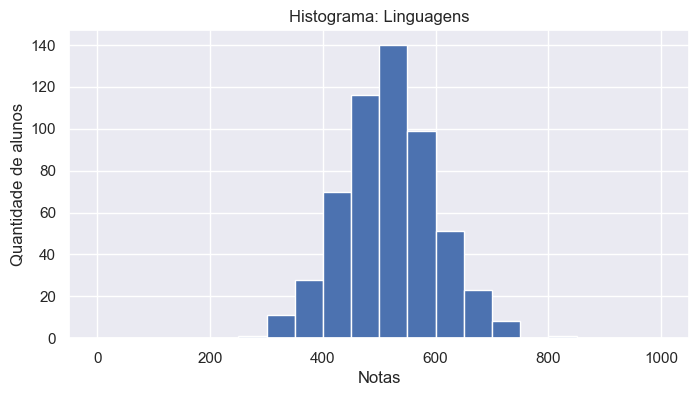

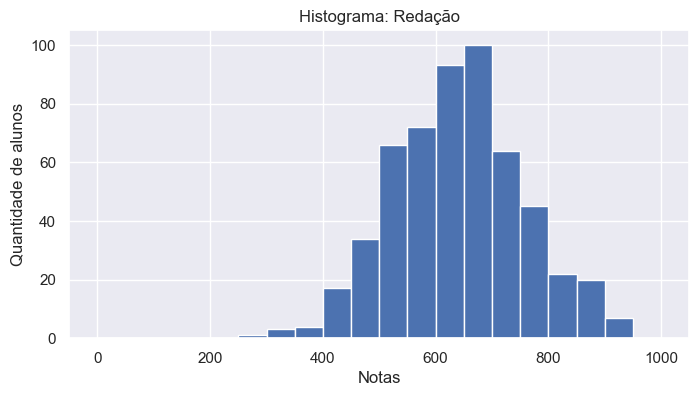

 É perceptível que ao colocar o range se vê o gráfico mais deslocado para a direita, principalmente no histograma da Redação
Já que normalmente as pessoas tiram notas um pouco mais altas, então o lado esquerdo que teriam os valores de 0 a 300 são poucos. 
Mas é mais provável ter valores de 700 a 1000 


Resumindo, o histograma cobre um intervalo maior, de 0 a 1000. A maioria dos dados está concentrada entre 400 e 800, com um pico em torno de 600. 
As pontuações abaixo de 400 e acima de 900 têm uma contagem muito baixa ou nula.
Porém acredito que os valores ainda seriam simétricos sim, pois mesmo um pouco deslocado ele não está com a curva para a direita

Por ter um intervalo maior os histogramas parecem menos simétricos do que os feitos anteriormente

Sendo assim, a simetria pode ser comprometida pela baixa contagem em extremos. Se o objetivo é analisar a distribuição central dos dados, o histograma SEM delimitar o range é mais apropriado


In [41]:
plt.hist(df_remover_na_todo.Linguagens,bins=20,range=[0,1000])
plt.title("Histograma: Linguagens")
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')
plt.show()

plt.hist(df_remover_na_todo.Redação,bins=20,range=[0,1000])
plt.title("Histograma: Redação")
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')
plt.show()

print(f''' É perceptível que ao colocar o range se vê o gráfico mais deslocado para a direita, principalmente no histograma da Redação
Já que normalmente as pessoas tiram notas um pouco mais altas, então o lado esquerdo que teriam os valores de 0 a 300 são poucos. 
Mas é mais provável ter valores de 700 a 1000 \n

Resumindo, o histograma cobre um intervalo maior, de 0 a 1000. A maioria dos dados está concentrada entre 400 e 800, com um pico em torno de 600. 
As pontuações abaixo de 400 e acima de 900 têm uma contagem muito baixa ou nula.
Porém acredito que os valores ainda seriam simétricos sim, pois mesmo um pouco deslocado ele não está com a curva para a direita\n
Por ter um intervalo maior os histogramas parecem menos simétricos do que os feitos anteriormente\n
Sendo assim, a simetria pode ser comprometida pela baixa contagem em extremos. Se o objetivo é analisar a distribuição central dos dados, o histograma SEM delimitar o range é mais apropriado''')



8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.


O numero de outliers encontrado na disciplina de Redação foi de 1
O numero de outliers encontrado na disciplina de Ciências da natureza foi de 2


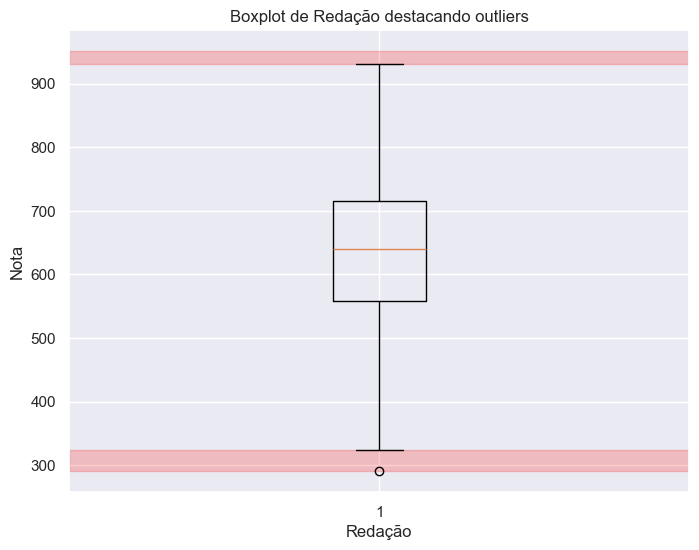

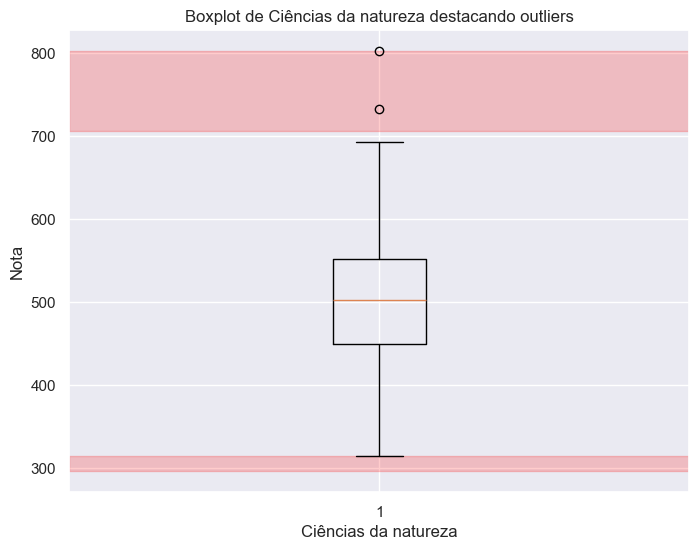

In [47]:
def outlier_iqr(dataset,colname):
    q25=np.quantile(dataset[colname],0.25)
    q75=np.quantile(dataset[colname],0.75)
    iqr=q75-q25
    out=iqr*1.5
    lower, upper = q25 - out, q75 + out

    outliers = []

    for i in dataset[colname].values:
        if((i > upper)or(i < lower)):
            outliers.append(i)
    print(f'O numero de outliers encontrado na disciplina de {colname} foi de {len(outliers)}')
    return lower, upper, outliers

for column in ['Redação','Ciências da natureza']:
  lower, upper, out =  outlier_iqr(df_remover_na, column)

  plt.figure(figsize=(8, 6))
  plt.boxplot(x=df_remover_na[column])

  plt.axhspan(ymin = df_remover_na[column].min(),ymax= lower,alpha=0.2, color='red')
  plt.axhspan(ymin = upper,ymax= df_remover_na[column].max(),alpha=0.2, color='red')

  plt.title(f"Boxplot de {column} destacando outliers")
  plt.ylabel('Nota')
  plt.xlabel(column)


# Tive que alterar o aprendizado na aula sobre como marca outliers, foi demonstrado no histograma, mas fiz no boxplot em pé, ao invés de deitado
# A mudança de axvspan para axhspan foi essencial para destacar corretamente os outliers no eixo Y

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)


In [43]:
df_total=df_remover_na.copy()
disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

df_media_disciplinas=df_total[disciplinas].sum(axis=0)/len(df_total)

print("A Média Nacional de cada disciplina antes da retirada dos outliers são:")
df_media_disciplinas



A Média Nacional de cada disciplina antes da retirada dos outliers são:


Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [44]:
# Utilizando a função para achar os outliers da questão anterior pelo IQR


def outlier_iqr(dataset,colname):
    q25=np.quantile(dataset[colname],0.25)
    q75=np.quantile(dataset[colname],0.75)
    iqr=q75-q25
    out=iqr*1.5
    lower, upper = q25 - out, q75 + out

    outliers = []

    for i in dataset[colname].values:
        if((i > upper)or(i < lower)):
            outliers.append(i)
    return lower, upper, outliers


#CASO EU REMOVA O OUTLIER
for column in disciplinas:
  lower, upper, out =  outlier_iqr(df_remover_na, column)
  
  df_outlier_remover=df_remover_na[(df_remover_na[column] >= lower) & (df_remover_na[column] <= upper)]
# >= valor mais baixo é o teto baixo do Q1 e menor ou igual é o teto do valor Q3

df_media_disciplinas_sem_out=df_outlier_remover[disciplinas].sum(axis=0)/len(df_outlier_remover)

print("A Média Nacional de cada disciplina caso remova os outliers são:")
print(df_media_disciplinas_sem_out)


# #CASO EU SUBSTITUA PELA MÉDIA OU MEDIANA

# for column in disciplinas:
#   lower, upper, out = outlier_iqr(df_remover_na, column)
#   media_coluna = df_remover_na[column].mean()

#   df_outlier_subs=df_remover_na.copy()

#   df_outlier_subs.loc[df_outlier_subs[column] < lower,column] =media_coluna
#   df_outlier_subs.loc[df_outlier_subs[column] > upper, column] = media_coluna


# df_media_disciplinas=df_outlier_subs[disciplinas].sum(axis=0)/len(df_outlier_subs)

# print("A Média Nacional de cada disciplina caso remova os outliers são:")
# print(df_media_disciplinas)



    

A Média Nacional de cada disciplina caso remova os outliers são:
Linguagens              517.399620
Ciências humanas        528.411815
Ciências da natureza    502.025033
Matemática              537.380554
Redação                 641.834594
dtype: float64


In [45]:
# VENDO A SIGNIFICANCIA DE 5%

# Existe algo cahmado diferença percentual que é a (média sem outlier- média com outlier)/média com outlier *100

significania=abs((df_media_disciplinas_sem_out-df_media_disciplinas)/df_media_disciplinas)*100
print(significania)

# Possuem valores tanto negativos como positivos, pois a diferença pode ter sido para mais ou para menos, por isso fazer abs()
for disciplina, valor in significania.items():
    if valor > 5:
        print(f"A diferença na disciplina {disciplina} é de {valor:.2f}%, o que é significativo.")
    print(f"A diferença na disciplina {disciplina} é de {valor:.2f}%, o que não é significativo.")

Linguagens              0.013052
Ciências humanas        0.011424
Ciências da natureza    0.023314
Matemática              0.038735
Redação                 0.100043
dtype: float64
A diferença na disciplina Linguagens é de 0.01%, o que não é significativo.
A diferença na disciplina Ciências humanas é de 0.01%, o que não é significativo.
A diferença na disciplina Ciências da natureza é de 0.02%, o que não é significativo.
A diferença na disciplina Matemática é de 0.04%, o que não é significativo.
A diferença na disciplina Redação é de 0.10%, o que não é significativo.


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.